In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cartopy
import cartopy.crs as ccrs
import matplotlib
%matplotlib inline
from netCDF4 import Dataset


import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.colors as colors
from sklearn import datasets
import iris.analysis
import numpy.ma as ma

import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point


import matplotlib.cm as mpl_cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.pyplot import xcorr


from scipy.interpolate import splrep, splev
from scipy.stats import pearsonr
from scipy import signal 

import math
from matplotlib import mlab

import regionmask

import warnings
warnings.filterwarnings("ignore")

In [3]:
# load dataset for MH &PI --all PMIP4 model

filename_3='/Volumes/GIDGET/cvdp_pr_regression/CESM2_midHolocene.cvdp_data.1-700.nc'
cesm=xr.open_dataset(filename_3,decode_times=False)

filename_4='/Volumes/GIDGET/cvdp_pr_regression/CESM2_piControl.cvdp_data.701-1200.nc'
pi_cesm=xr.open_dataset(filename_4,decode_times=False)

filename_5='/Volumes/GIDGET/cvdp_pr_regression/EC-Earth3-LR_midHolocene.cvdp_data.2245-2445.nc'
ec=xr.open_dataset(filename_5,decode_times=False)

filename_6='/Volumes/GIDGET/cvdp_pr_regression/EC-Earth3-LR_piControl.cvdp_data.2219-2419.nc'
pi_ec=xr.open_dataset(filename_6,decode_times=False)


filename_31='/Volumes/GIDGET/cvdp_pr_regression/FGOALS-f3-L_midHolocene.cvdp_data.1020-1219.nc'
fgoalsf3=xr.open_dataset(filename_31,decode_times=False)

# fgoals-f3 is 'historial', not PI
filename_32='/Volumes/GIDGET/cvdp_pr_regression/FGOALS-f3-L_historical.cvdp_data.1850-1900.nc'
pi_fgoalsf3=xr.open_dataset(filename_32,decode_times=False)

filename_33='/Volumes/GIDGET/cvdp_pr_regression/FGOALS-g3_midHolocene.cvdp_data.627-1126.nc'
fgoalsg3=xr.open_dataset(filename_33,decode_times=False)

filename_34='/Volumes/GIDGET/cvdp_pr_regression/FGOALS-g3_piControl.cvdp_data.200-699.nc'
pi_fgoalsg3=xr.open_dataset(filename_34,decode_times=False)


filename_11='/Volumes/GIDGET/cvdp_pr_regression/GISS-E2-1-G_midHolocene.cvdp_data.2900-2999.nc'
giss=xr.open_dataset(filename_11,decode_times=False)

filename_12='/Volumes/GIDGET/cvdp_pr_regression/GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc'
pi_giss=xr.open_dataset(filename_12,decode_times=False)

filename_13='/Volumes/GIDGET/cvdp_pr_regression/HadGEM3-GC31-LL_midHolocene.cvdp_data.2250-2349.nc'
hadgem=xr.open_dataset(filename_13,decode_times=False)

filename_14='/Volumes/GIDGET/cvdp_pr_regression/HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc'
pi_hadgem=xr.open_dataset(filename_14,decode_times=False)

filename_15='/Volumes/GIDGET/cvdp_pr_regression/INM-CM4-8_midHolocene.cvdp_data.1900-1999.nc'
inm=xr.open_dataset(filename_15,decode_times=False)

filename_16='/Volumes/GIDGET/cvdp_pr_regression/INM-CM4-8_piControl.cvdp_data.1850-2380.nc'
pi_inm=xr.open_dataset(filename_16,decode_times=False)

filename_17='/Volumes/GIDGET/cvdp_pr_regression/IPSL-CM6A-LR_midHolocene.cvdp_data.1850-2399.nc'
ipsl=xr.open_dataset(filename_17,decode_times=False)

filename_18='/Volumes/GIDGET/cvdp_pr_regression/IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc'
pi_ipsl=xr.open_dataset(filename_18,decode_times=False)


filename_21='/Volumes/GIDGET/cvdp_pr_regression/MPI-ESM1-2-LR_midHolocene.cvdp_data.1001-1500.nc'
mpi2=xr.open_dataset(filename_21,decode_times=False)

filename_22='/Volumes/GIDGET/cvdp_pr_regression/MPI-ESM1-2-LR_piControl.cvdp_data.1850-2849.nc'
pi_mpi2=xr.open_dataset(filename_22,decode_times=False)

filename_23='/Volumes/GIDGET/cvdp_pr_regression/MRI-ESM2-0_midHolocene.cvdp_data.1951-2150.nc'
mri=xr.open_dataset(filename_23,decode_times=False)

filename_24='/Volumes/GIDGET/cvdp_pr_regression/MRI-ESM2-0_piControl.cvdp_data.1850-2550.nc'
pi_mri=xr.open_dataset(filename_24,decode_times=False)


filename_29='/Volumes/GIDGET/cvdp_pr_regression/NorESM2-LM_midHolocene.cvdp_data.2101-2200.nc'
noresm2=xr.open_dataset(filename_29,decode_times=False)

filename_30='/Volumes/GIDGET/cvdp_pr_regression/NorESM2-LM_piControl.cvdp_data.1710-2100.nc'
pi_noresm2=xr.open_dataset(filename_30,decode_times=False)



## load the variable --amoc_pr_regression_ann 
### unit: mm/day/Sv

In [4]:
# 11 models in total
cesm_amoc_pr=cesm.amoc_pr_regression_ann
pi_cesm_amoc_pr=pi_cesm.amoc_pr_regression_ann

ec_amoc_pr=ec.amoc_pr_regression_ann
pi_ec_amoc_pr=pi_ec.amoc_pr_regression_ann

fgoalsf3_amoc_pr=fgoalsf3.amoc_pr_regression_ann
pi_fgoalsf3_amoc_pr=pi_fgoalsf3.amoc_pr_regression_ann

fgoalsg3_amoc_pr=fgoalsg3.amoc_pr_regression_ann
pi_fgoalsg3_amoc_pr=pi_fgoalsg3.amoc_pr_regression_ann

giss_amoc_pr=giss.amoc_pr_regression_ann
pi_giss_amoc_pr=pi_giss.amoc_pr_regression_ann

hadgem_amoc_pr=hadgem.amoc_pr_regression_ann
pi_hadgem_amoc_pr=pi_hadgem.amoc_pr_regression_ann

inm_amoc_pr=inm.amoc_pr_regression_ann
pi_inm_amoc_pr=pi_inm.amoc_pr_regression_ann

ipsl_amoc_pr=ipsl.amoc_pr_regression_ann
pi_ipsl_amoc_pr=pi_ipsl.amoc_pr_regression_ann

mpi2_amoc_pr=mpi2.amoc_pr_regression_ann
pi_mpi2_amoc_pr=pi_mpi2.amoc_pr_regression_ann

mri_amoc_pr=mri.amoc_pr_regression_ann
pi_mri_amoc_pr=pi_mri.amoc_pr_regression_ann


noresm2_amoc_pr=noresm2.amoc_pr_regression_ann
pi_noresm2_amoc_pr=pi_noresm2.amoc_pr_regression_ann


In [5]:
amoc_pr=[cesm_amoc_pr, ec_amoc_pr, fgoalsf3_amoc_pr, fgoalsg3_amoc_pr,
         giss_amoc_pr, hadgem_amoc_pr, inm_amoc_pr, ipsl_amoc_pr, 
         mpi2_amoc_pr, mri_amoc_pr, noresm2_amoc_pr]


In [6]:
pi_amoc_pr=[pi_cesm_amoc_pr, pi_ec_amoc_pr, pi_fgoalsf3_amoc_pr, pi_fgoalsg3_amoc_pr,
         pi_giss_amoc_pr, pi_hadgem_amoc_pr, pi_inm_amoc_pr, pi_ipsl_amoc_pr, 
         pi_mpi2_amoc_pr, pi_mri_amoc_pr, pi_noresm2_amoc_pr]

In [8]:
max_amoc_30_diff=[0.30673027, 1.2563648,0.48369217, 0.7757225,  0.10418701, 1.3791008, -0.7268448, -0.5384302,   -0.00030136108, 2.2410336,  0.2731018]

In [9]:
Modelname=['cesm', 'ec', 'fgoalsf3', 'fgoalsg3',
           'giss','hadgem', 'inm', 'ipsl', 
           'mpi2', 'mri', 'noresm2']

In [10]:

for j in range (0,len(Modelname)):
    globals()[Modelname[j]+'_pr_change_caused_by_amoc']=max_amoc_30_diff[j]*(amoc_pr[j] + pi_amoc_pr[j])/2

## load the variable--' pr_spatialmean_ann' (annual mean precipitation)

In [11]:
# mh & pi 

cesm_pr_ann=cesm.pr_spatialmean_ann
pi_cesm_pr_ann=pi_cesm.pr_spatialmean_ann

ec_pr_ann=ec.pr_spatialmean_ann
pi_ec_pr_ann=pi_ec.pr_spatialmean_ann

fgoalsf3_pr_ann=fgoalsf3.pr_spatialmean_ann
pi_fgoalsf3_pr_ann=pi_fgoalsf3.pr_spatialmean_ann

fgoalsg3_pr_ann=fgoalsg3.pr_spatialmean_ann
pi_fgoalsg3_pr_ann=pi_fgoalsg3.pr_spatialmean_ann

giss_pr_ann=giss.pr_spatialmean_ann
pi_giss_pr_ann=pi_giss.pr_spatialmean_ann

hadgem_pr_ann=hadgem.pr_spatialmean_ann
pi_hadgem_pr_ann=pi_hadgem.pr_spatialmean_ann

inm_pr_ann=inm.pr_spatialmean_ann
pi_inm_pr_ann=pi_inm.pr_spatialmean_ann

ipsl_pr_ann=ipsl.pr_spatialmean_ann
pi_ipsl_pr_ann=pi_ipsl.pr_spatialmean_ann

mpi2_pr_ann=mpi2.pr_spatialmean_ann
pi_mpi2_pr_ann=pi_mpi2.pr_spatialmean_ann

mri_pr_ann=mri.pr_spatialmean_ann
pi_mri_pr_ann=pi_mri.pr_spatialmean_ann

noresm2_pr_ann=noresm2.pr_spatialmean_ann
pi_noresm2_pr_ann=pi_noresm2.pr_spatialmean_ann



In [12]:
pr_ann=[cesm_pr_ann, ec_pr_ann, fgoalsf3_pr_ann,fgoalsg3_pr_ann,
         giss_pr_ann, hadgem_pr_ann, inm_pr_ann, ipsl_pr_ann, 
         mpi2_pr_ann, mri_pr_ann,noresm2_pr_ann]

In [13]:
pi_pr_ann=[pi_cesm_pr_ann, pi_ec_pr_ann, pi_fgoalsf3_pr_ann, pi_fgoalsg3_pr_ann,
         pi_giss_pr_ann, pi_hadgem_pr_ann, pi_inm_pr_ann, pi_ipsl_pr_ann, 
         pi_mpi2_pr_ann, pi_mri_pr_ann, pi_noresm2_pr_ann]

In [14]:
for j in range (0,len(Modelname)):
    globals()[Modelname[j]+'_pr_change']=pr_ann[j] - pi_pr_ann[j]

In [15]:
pr_reg_modelname=['CESM2','EC-Earth3-LR','FGOALS-f3-L','FGOALS-g3',
                  'GISS-E2-1-G','HadGEM3-GC31-LL','INM-CM4-8','IPSL-CM6A-LR',
                  'MPI-ESM1-2-LR','MRI-ESM2-0','NorESM2-LM']

# amoc-pr fingerprint
### unit: % / Sv 
### amoc_pr_regression / annual mean pr 

In [16]:
# mh

for k in range (0,len(Modelname)):
    globals()[Modelname[k]+'_amoc_induced_pr_change']=(amoc_pr[k] / pr_ann[k])

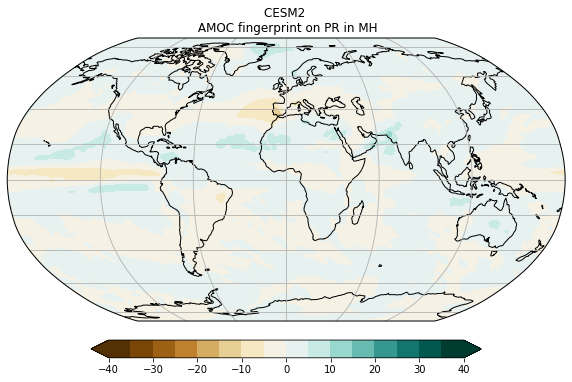

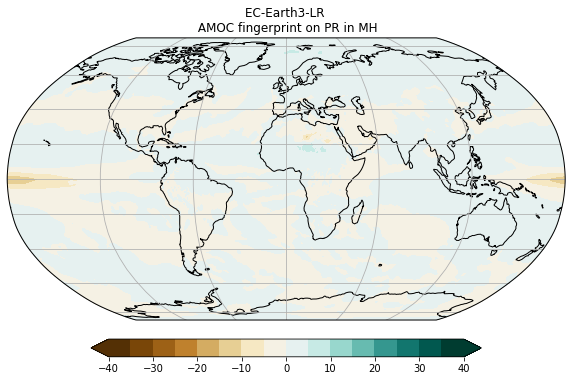

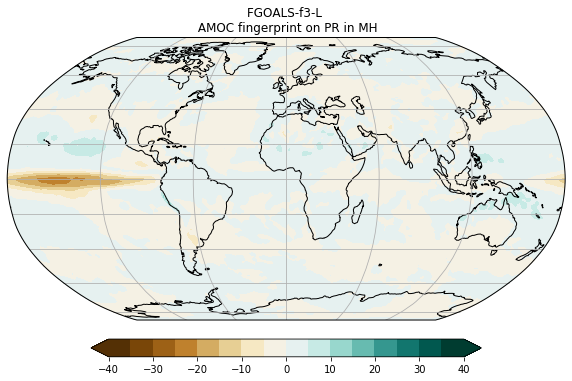

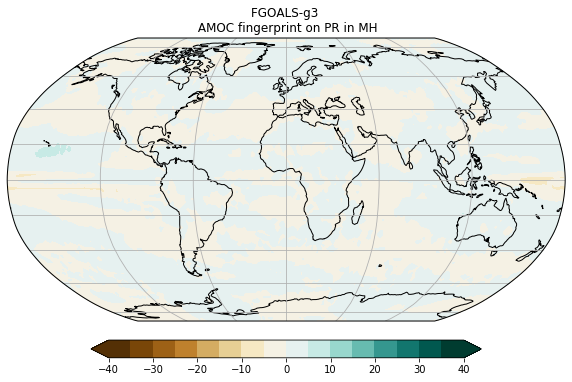

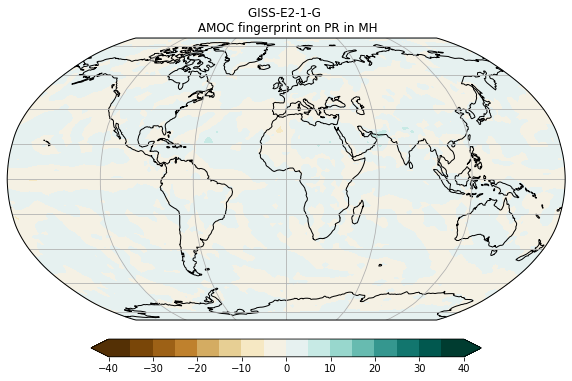

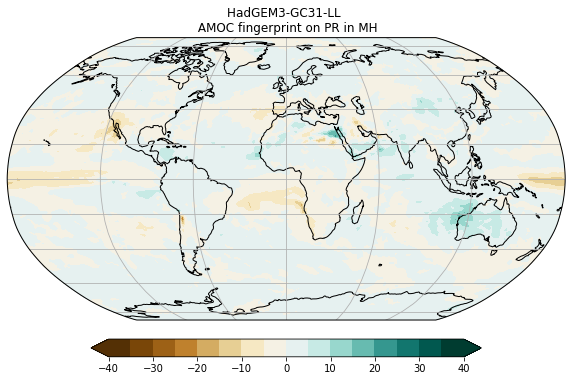

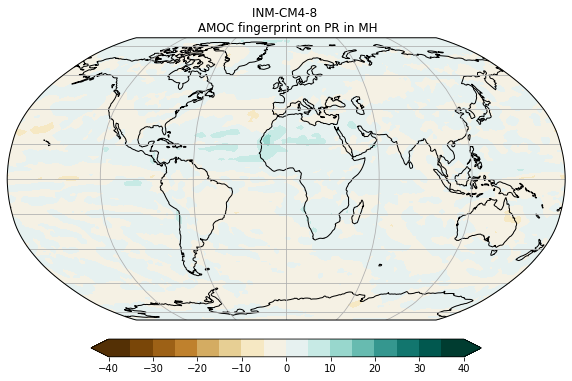

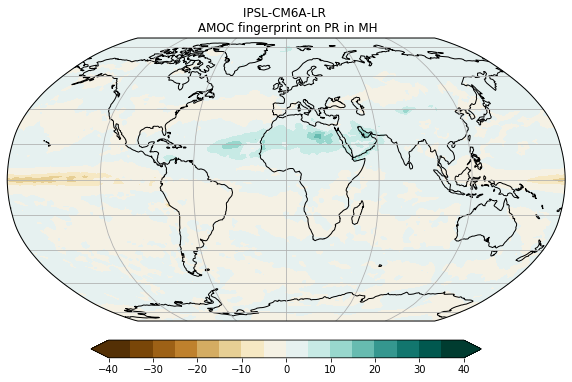

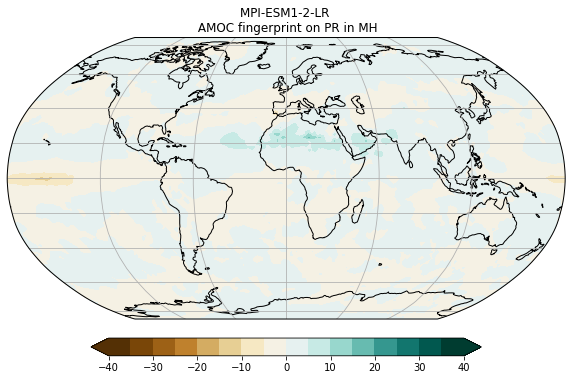

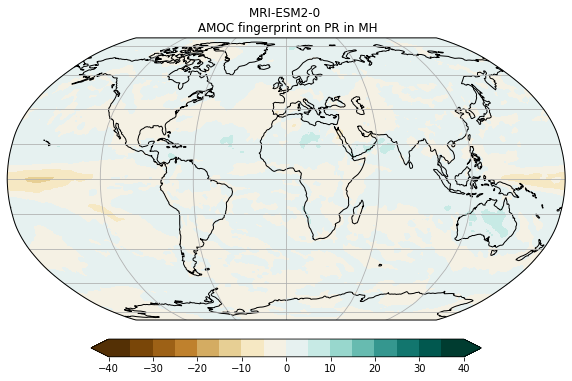

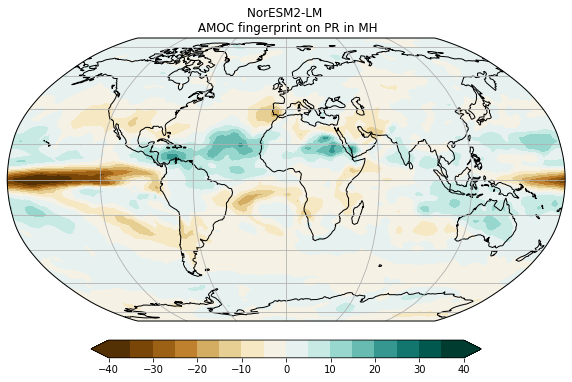

In [13]:
for i in range (0, len(Modelname)):

    projection = ccrs.Robinson()

    transform=ccrs.PlateCarree()
    
    bounds_2 = np.arange(-40,45,5)
    
    norm_2 = colors.BoundaryNorm(boundaries=bounds_2, ncolors=256)

    
    lat_2 = globals()[Modelname[i]+'_amoc_induced_pr_change'].lat
    lon_2 = globals()[Modelname[i]+'_amoc_induced_pr_change'].lon

    
    globals()[Modelname[i]+'_amoc_induced_pr_change'], lon_2 = add_cyclic_point(globals()[Modelname[i]+'_amoc_induced_pr_change'], coord=lon_2)

    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)

    ax.coastlines()
    ax.gridlines()
    
    coe_fig=ax.contourf(lon_2, lat_2, 100 * globals()[Modelname[i]+'_amoc_induced_pr_change'], levels=bounds_2,transform=transform, cmap='BrBG', extend='both', norm=norm_2)
    
    cax_2,kw_2 = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
    
    plt.colorbar(coe_fig,cax=cax_2,extend='both',**kw_2)
    ax.set(title='%s \n AMOC fingerprint on PR in MH' %(pr_reg_modelname[i]))
    

In [18]:
# pi

for k in range (0,len(Modelname)):
    globals()[Modelname[k]+'_pi_amoc_induced_pr_change']=(pi_amoc_pr[k] / pi_pr_ann[k])

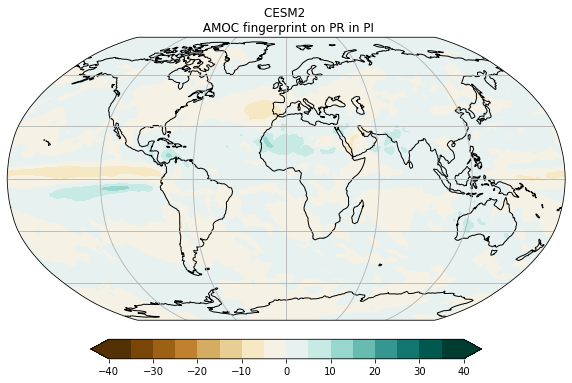

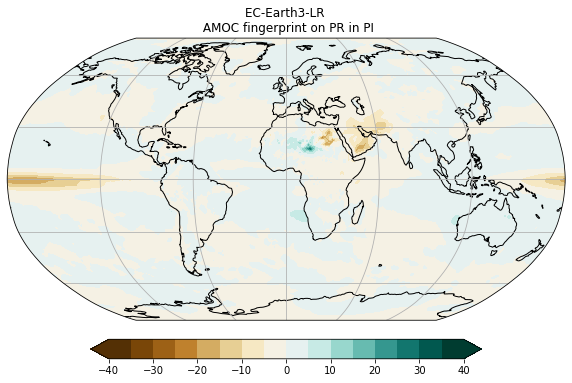

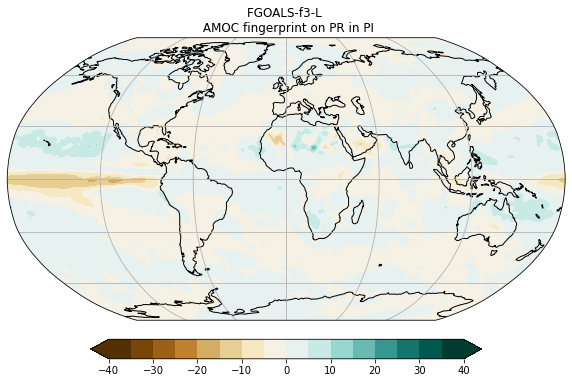

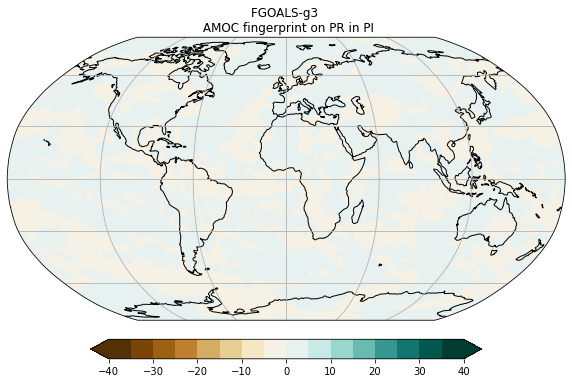

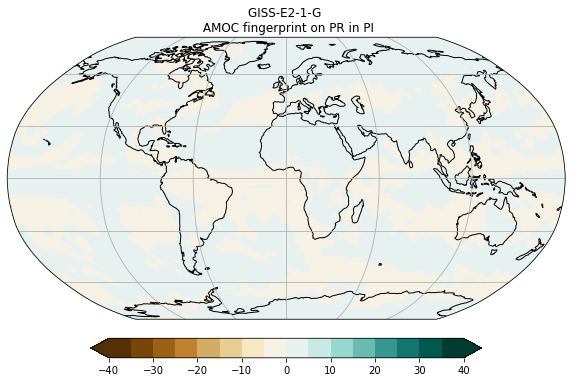

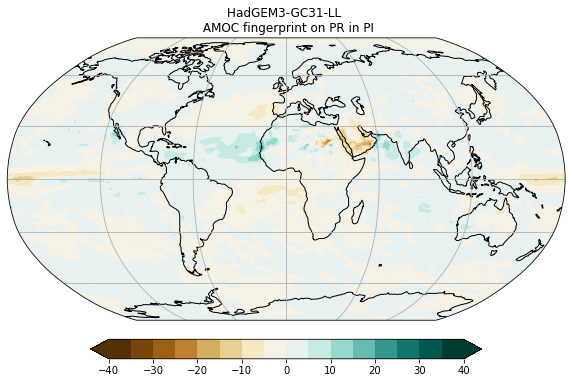

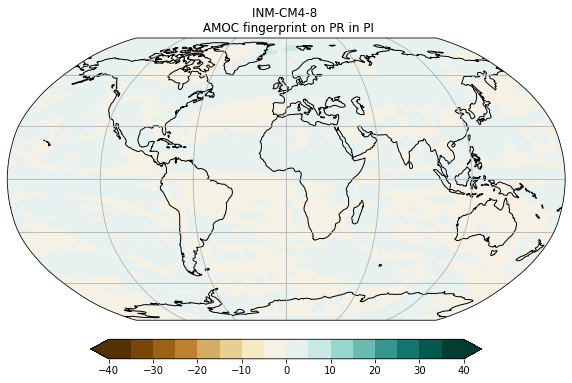

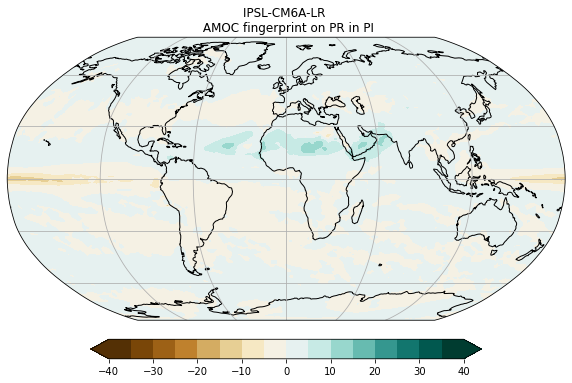

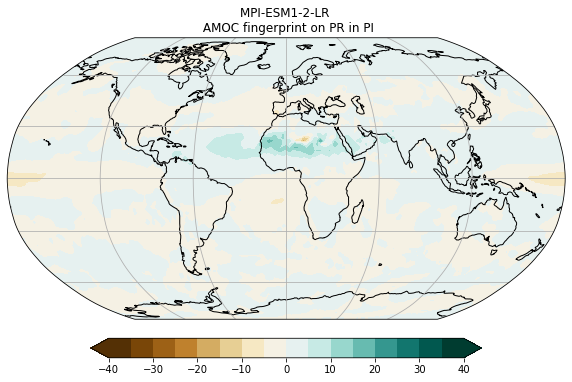

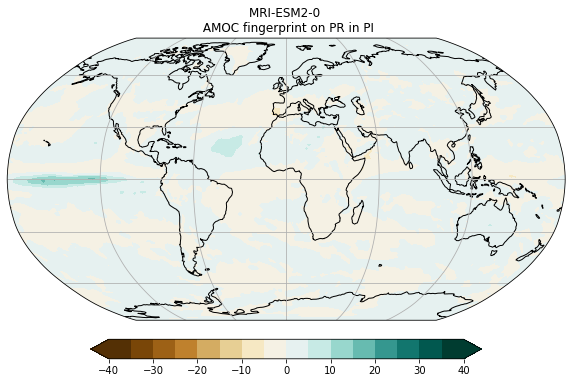

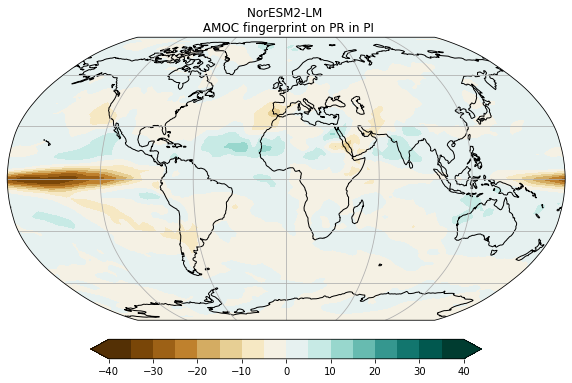

In [19]:
for i in range (0, len(Modelname)):

    projection = ccrs.Robinson()

    transform=ccrs.PlateCarree()
    
    bounds_2 = np.arange(-40,45,5)
    
    norm_2 = colors.BoundaryNorm(boundaries=bounds_2, ncolors=256)

    
    lat_2 = globals()[Modelname[i]+'_pi_amoc_induced_pr_change'].lat
    lon_2 = globals()[Modelname[i]+'_pi_amoc_induced_pr_change'].lon

    
    globals()[Modelname[i]+'_pi_amoc_induced_pr_change'], lon_2 = add_cyclic_point(globals()[Modelname[i]+'_pi_amoc_induced_pr_change'], coord=lon_2)

    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)

    ax.coastlines()
    ax.gridlines()
    
    coe_fig=ax.contourf(lon_2, lat_2, 100 * globals()[Modelname[i]+'_pi_amoc_induced_pr_change'], levels=bounds_2,transform=transform, cmap='BrBG', extend='both', norm=norm_2)
    
    cax_2,kw_2 = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
    
    plt.colorbar(coe_fig,cax=cax_2,extend='both',**kw_2)
    ax.set(title='%s \n AMOC fingerprint on PR in PI' %(pr_reg_modelname[i]))
    